<a href="https://colab.research.google.com/github/Jma374/BTE-320/blob/main/DTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

|--- loan_status_Fully Paid <= 0.50
|   |--- loan_status_Does not meet the credit policy. Status:Fully Paid <= 0.50
|   |   |--- last_pymnt_d_Jun-16 <= 0.50
|   |   |   |--- loan_status_In Grace Period <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- loan_status_In Grace Period >  0.50
|   |   |   |   |--- class: 0
|   |   |--- last_pymnt_d_Jun-16 >  0.50
|   |   |   |--- loan_status_Late (31-120 days) <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- loan_status_Late (31-120 days) >  0.50
|   |   |   |   |--- class: 1
|   |--- loan_status_Does not meet the credit policy. Status:Fully Paid >  0.50
|   |   |--- class: 0
|--- loan_status_Fully Paid >  0.50
|   |--- class: 0



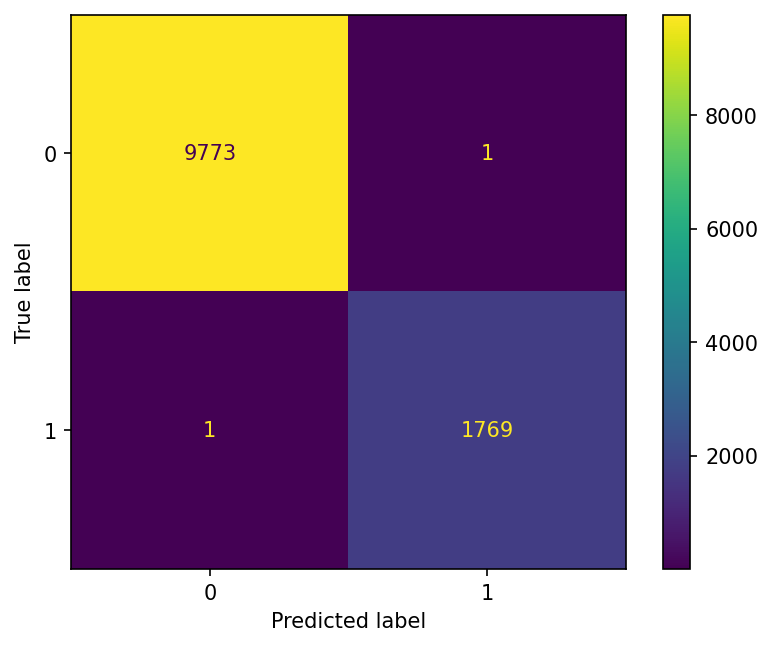

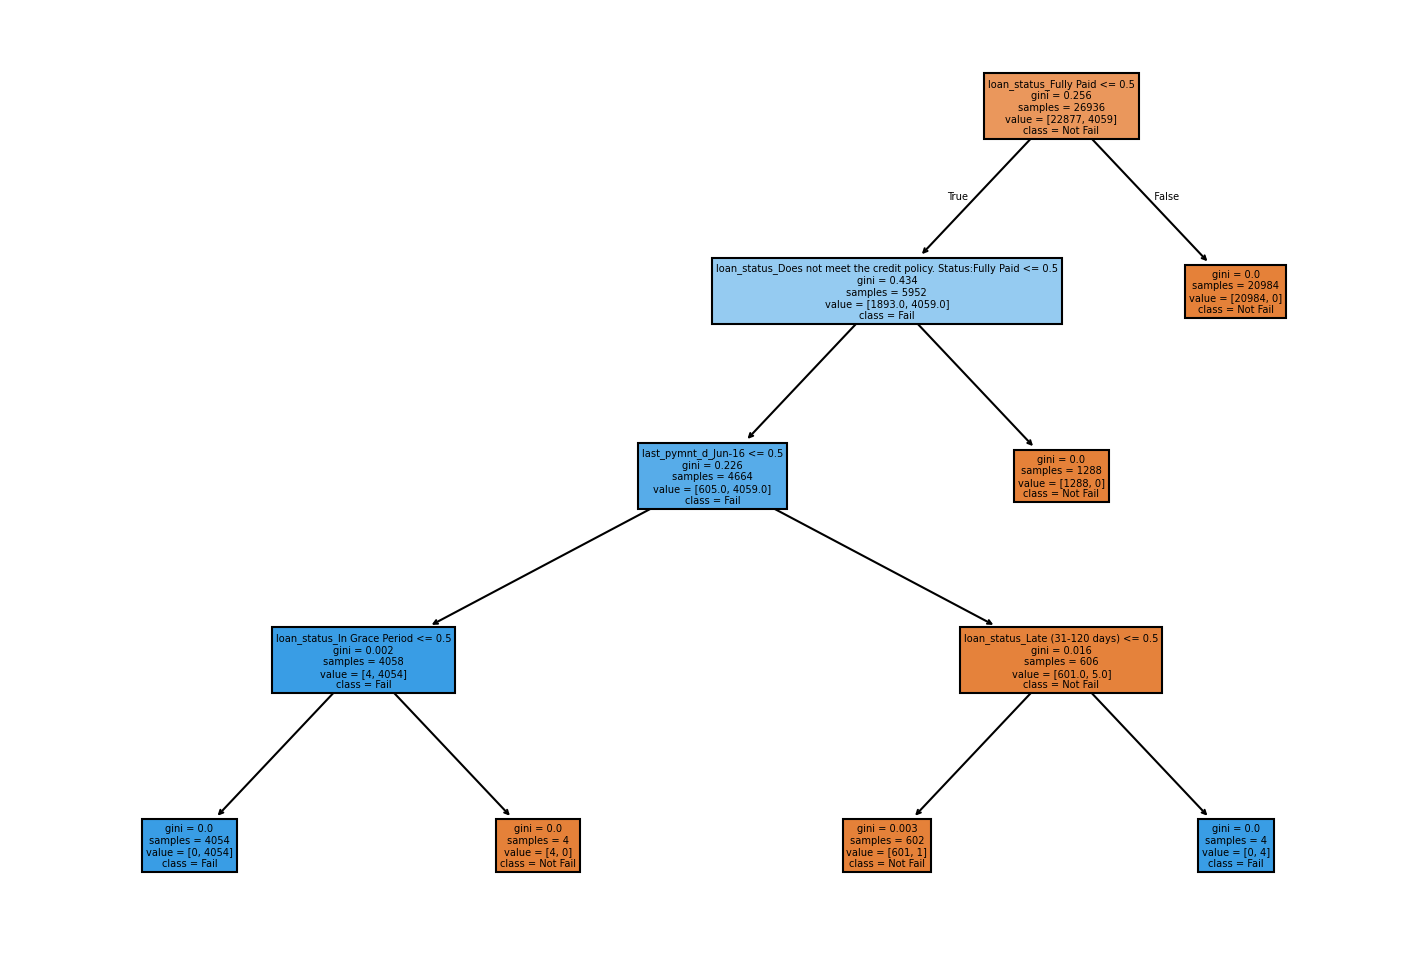

Accuracy: 1.0
Precision: 0.999
Recall: 0.999
Kappa: 0.999


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the uploaded CSV data
defaultdata = pd.read_csv('Anonymize_Loan_Default_data.csv', encoding='latin-1')
plt.rcParams['figure.dpi'] = 150

# Create a DataFrame X containing the feature columns (adjust column names as needed)
X = defaultdata.drop(columns=['repay_fail'])  # Exclude the target variable

# Convert 'term' column to numerical representation if it exists
if 'term' in X.columns:
    X['term'] = X['term'].str.extract('(\d+)').astype(float)  # Extract numerical part and convert to float

# Identify non-numeric columns and apply encoding
non_numeric_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=non_numeric_cols, drop_first=True)

# Create a DataFrame y containing the target variable
y = defaultdata['repay_fail']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Initialize the decision tree classifier
DTC = DecisionTreeClassifier(max_leaf_nodes=6, random_state=123)

# Fit the tree to the training data
DTC.fit(X_train, y_train)

# Print the text summary of the tree
DTC_tree = export_text(DTC, feature_names=list(X.columns))
print(DTC_tree)

# Make predictions for the test data
y_pred = DTC.predict(X_test)

# Create and display a confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.savefig('confMatrix.png')

# Plot the tree
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
plot_tree(DTC, feature_names=X.columns, class_names=['Not Fail', 'Fail'], filled=True)
plt.show()

# Accuracy Metrics

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, cohen_kappa_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy,3))

# Calculate the precision for the model
precision = precision_score(y_test, y_pred)
print("Precision:", round(precision,3))

# Calculate the recall for the model
recall = recall_score(y_test, y_pred)
print("Recall:", round(recall, 3))

# Calculate kappa for the model
kappa = cohen_kappa_score(y_test, y_pred)
print("Kappa:", round(kappa, 3))


In [ ]:
defaultdata.head()


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
0,2,2,2,0.0,0.0,0.0,36 months,0.00,0.00,< 1 year,...,1.0,0.000000,0.00,0.00,0.00,Jan-07,0.00,Jan-07,Jan-07,1
1,3,545583,703644,2500.0,2500.0,2500.0,36 months,13.98,85.42,4 years,...,10.0,3075.291779,3075.29,2500.00,575.29,Jul-13,90.85,Aug-13,Jun-16,0
2,4,532101,687836,5000.0,5000.0,5000.0,36 months,15.95,175.67,4 years,...,15.0,2948.760000,2948.76,1909.02,873.81,Nov-11,175.67,NaN,Mar-12,1
3,5,877788,1092507,7000.0,7000.0,7000.0,36 months,9.91,225.58,10+ years,...,20.0,8082.391880,8082.39,7000.00,1082.39,Mar-14,1550.27,NaN,Mar-14,0
4,6,875406,1089981,2000.0,2000.0,2000.0,36 months,5.42,60.32,10+ years,...,15.0,2161.663244,2161.66,2000.00,161.66,Feb-14,53.12,NaN,Jun-16,0
